In [57]:
## Use DASH to build user GUI
# %pip install dash
# %pip install nbformat

from dash import Dash, html, dcc, callback, Output, Input, ctx
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from presets import setmedium

mediumProp = setmedium.setMedium('Water',0)

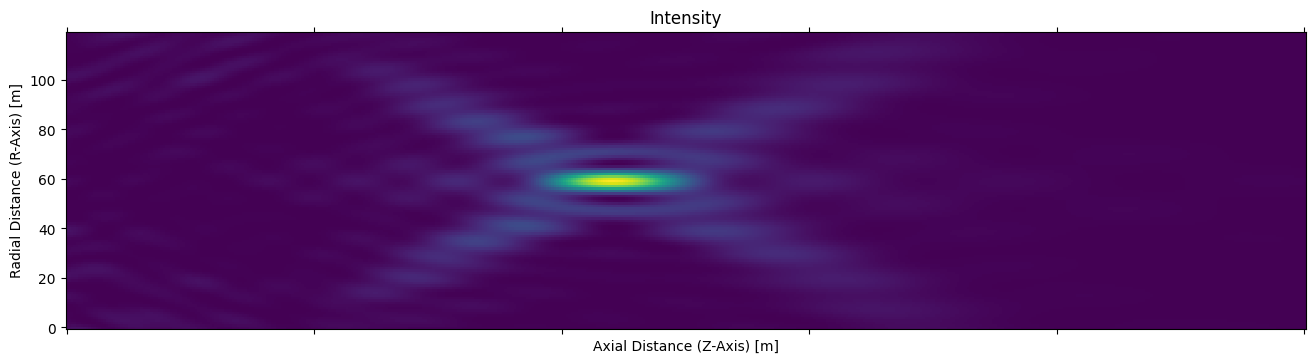

In [58]:
press_data = pd.read_csv(r"C:\Users\geral\OneDrive\Documents\GitHub\TempCompliance4HIFU\src\sample_data.csv")  # sample_data == 121 x 501 double

# Testing Graph Allocation
plt.matshow(press_data)
plt.gca().invert_yaxis()
plt.tick_params(labeltop=False)
plt.xlabel('Axial Distance (Z-Axis) [m]')
plt.ylabel('Radial Distance (R-Axis) [m]')
plt.title('Intensity')
plt.show(fig)

In [59]:
import calculateRayleighIntegral, settransducer

trans = settransducer.setTransducer(9,0.05,0.05,1)
medium = setmedium.setMedium('Water',dict())
field = dict(numAxialStep = 100, numRadialStep= 100)


pressure_field, z_values, r_values = calculateRayleighIntegral.generateField(trans,medium,field)

1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.0 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.0 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.0 %
29.0 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.0 %
56.0 %
57.0 %
58.0 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %
[[0.         0.00256629 0.0025618  ... 0.00167126 0.00164857 0.00162621]
 [0.         0.0025564  0.00255234 ... 0.00168953 0.00166611 0.00164304]
 [0.         0.00254749 0.00254414 ... 0.0017079  0.00168373 0.00165995]
 ...
 [0.         0.00254749 0.00254414 ... 0.0017079  0.00168373 0.00165995]
 [0.        

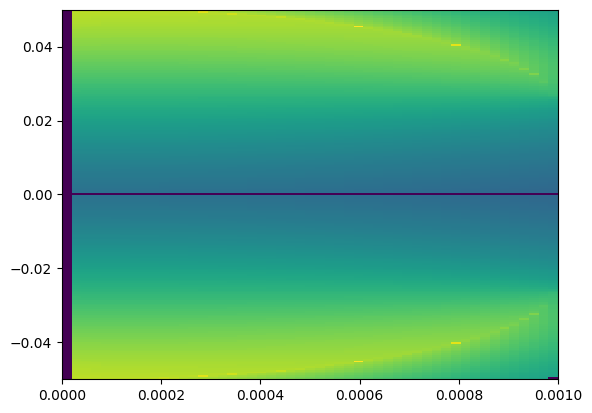

In [60]:
press_data = pressure_field

fig = plt.imshow(
    press_data,
    aspect = "auto",interpolation = 'none',
    extent=[z_values[0],z_values[-1], r_values[-1], r_values[0]],
    origin='lower',
)
# plt.savefig('py.png')

In [61]:
# help(html.Div)

In [62]:
app = Dash('tempCompliance4HIFU')
app.layout = [

    # Title
    html.H1(children = 'Temperature Compliance for HIFU Transducers', style = {'textAlign':'center'}), 


    # TOP Section - Button and Messages
    html.Div([
        html.Button('CALCULATE PRESSURE AND TEMPERATURE', id='button', n_clicks=0),
        html.Div(id='message_Display',style={'textAlign':'left'}),
    ],style={'width': '50%', 'float':'right', 'display': 'inline-block','padding': '10px 5px'}),
    
    
    # RIGHT Section - DISPLAYS
    html.Div([
        html.H2('Results', style ={'textAlign':'center'}), 
            dcc.Dropdown(['Pressure','Intensity','Temperature'],'Intensity',id='DROP_field2D'),
            dcc.Graph(id='GRAPH_field2D',hoverData={'points': [{'customdata': 'Pressure'}]}),
            dcc.Graph(id='GRAPH_time1D'),
    ], style={'width': '50%', 'float': 'right', 'display': 'inline-block'}),


    # SPACE
    html.Div([html.H3(' ',style ={'textAlign':'center'})],style={'width':'3%', 'float': 'right', 'display': 'inline-block'}),


    # MIDDLE Section - INPUTS
    html.Div([     
            
        # Trandsucer Section (Top)
        html.H3('Transducer', style ={'textAlign':'center'}), 

        html.P('Frequency [MHz]', style ={'textAlign':'left'}),
        dcc.Input(id="Frequency", type='number', placeholder='Input Frequency'),

        html.P('Radius [mm]', style ={'textAlign':'left'}),
        dcc.Input(id="Radius", type='number', placeholder='Input Radius'),

        html.P('Focus Distance [mm]', style ={'textAlign':'left'}),
        dcc.Input(id="Focus", type='number', placeholder='Input Focus Distance'),

        html.P('Initial Pressure [mm]', style ={'textAlign':'left'}),
        dcc.Input(id="InitPress", type='number', placeholder='Input Initial Pressure'),


        # Heating Section (Middle)
        html.H3('Heating', style ={'textAlign':'center'}), 

        html.P('Time Heating [s]', style ={'textAlign':'left'}),
        dcc.Input(id="HeatTime", type='number', placeholder='Input Heat Time'),

        html.P('Time Cooling [s]', style ={'textAlign':'left'}),
        dcc.Input(id="CoolTime", type='number', placeholder='Input Cool Time'),

        html.P('Duty Cycle [Percentage]', style ={'textAlign':'left'}),
        dcc.Input(id="DutyCycle", type='number', placeholder='Input Duty Cycle'),


        # Plotting Section
        html.H3('2D Plotting Range', style ={'textAlign':'center'}), 

        html.P('Radial [m]', style ={'textAlign':'left'}),
        dcc.Input(id="rAxis", type='number', placeholder='Input Radial Max Range'),

        html.P('Axial [m]', style ={'textAlign':'left'}),
        dcc.Input(id="zAxis", type='number', placeholder='Input Axial Max Range'),

        html.P('Step Size [m]', style ={'textAlign':'left'}),
        dcc.Input(id="stepSize", type='number', placeholder='Input Step Size'),

    ], style={'width': '15%', 'float': 'right', 'display': 'inline-block'}),


    # SPACE
    html.Div([html.H3(' ',style ={'textAlign':'center'})],style={'width':'3%', 'float': 'right', 'display': 'inline-block'}),


    # LEFT Section - Medium 
    html.Div([  
        html.H3('Medium', style ={'textAlign':'center'}), 

        html.P('Presets', style ={'textAlign':'left'}), 
        dcc.Dropdown(['Custom','Water','Glycerol','Egg White','Castor Oil'],'Water',id='DROP_medium'),
        
        html.P('Speed of Sound [m/s]', style ={'textAlign':'left'}), 
        dcc.Input(id="Speed", type='number', placeholder='Input Speed of Sound'),

        html.P('Density [kg/m^3]', style ={'textAlign':'left'}),
        dcc.Input(id="Density", type='number', placeholder='Input Density'),

        html.P('Absorption Coeffient [Np/(m*MHz^2)]', style ={'textAlign':'left'}),
        dcc.Input(id="AbsCoeff", type='number', placeholder='Input Absorption Coefficient'),
    
        html.P('Specific Heat Capacity [J/(kg*K)]', style ={'textAlign':'left'}),
        dcc.Input(id="SpecHeatCap", type='number', placeholder='Input Specific Heat Capacity'),
            
        html.P('Thermal Diffusivity [(m^2)/s]', style ={'textAlign':'left'}),
        dcc.Input(id="ThermDiff", type='number', placeholder='Input Thermal Diffusivity'),  
    ], style={'width': '15%', 'float': 'right', 'display': 'inline-block'}),

]

##### ##### Callbacks ##### ##### 


# Set Medium Properties Callback
@callback(
    Output('Speed','value'),
    Output('Density','value'),
    Output('AbsCoeff','value'),
    Output('SpecHeatCap','value'),
    Output('ThermDiff','value'),
    Input('DROP_medium','value'),
    Input('Speed','value'),
    Input('Density','value'),
    Input('AbsCoeff','value'),
    Input('SpecHeatCap','value'),
    Input('ThermDiff','value'),
)
def getMedium(dropdown, Speed, dens, abscoeff, heatcap, thermdiff):
    if Speed == None: Speed = 0
    if dens == None: dens = 0
    if abscoeff == None: abscoeff = 0
    if heatcap == None: heatcap = 0
    if thermdiff == None: thermdiff = 0
    userIn = dict(speed = Speed, density = dens, absCoeff = abscoeff, specHeatCap = heatcap, thermDiff = thermdiff)
    mediumProp = setmedium.setMedium(dropdown, userIn)
    return mediumProp['speed'], mediumProp['density'], mediumProp['absCoeff'], mediumProp['specHeatCap'], mediumProp['thermDiff']


# When Button is Pressed Callback
@callback(
    Output('message_Display', 'children'),
    Input('button','n_clicks')
)
def update_message(button):
    if 'button' == ctx.triggered_id:
        msg = 'Button Pressed'
    else:
        msg = 'Button Not Pressed'
    return html.Div(msg)




# Updating 2D Graph
@callback(
    Output('GRAPH_field2D','figure'),
    Input('DROP_field2D','value'),
)
def update_figure(dropdownSel):
    
    match dropdownSel:
        case 'Intensity':
            display_array = press_data^2
        case 'Pressure':
            display_array = press_data
        case 'Temperature':
            display_array = press_data/2

    # f = plt.figure()
    # nx = int(f.get_figwidth() * f.dpi)
    # ny = int(f.get_figheight() * f.dpi)
    # data = np.random.random((ny, nx))
    # f.figimage(data)
    # plt.show()

    # fig = plt.figure()
    # plt.matshow(display_array)
    # plt.xlabel('Axial Distance (Z-Axis) [m]')
    # plt.ylabel('Radial Distance (R-Axis) [m]')
    # plt.title('Intensity')
    # plt.show(fig)
    # return fig





# Execute App
if __name__ == '__main__':
    app.run(debug=True)
